In [1]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
# import mpld3
import sounddevice
# mpld3.enable_notebook()
from utils.code_exercise1 import *
from utils.code_exercise2 import *
from scipy.signal import get_window

/Users/christoper/.pyenv/versions/3.7.6/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/Users/christoper/.pyenv/versions/3.7.6/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


In [2]:
y1, sr1 = librosa.core.load("data/exercise2/speech1.wav", sr=None)
y2, sr2 = librosa.core.load('data/exercise2/phone.wav', sr=None)

In [3]:
def compute_stft(v_signal: np.ndarray, sampling_rate: int, frame_length: int, frame_shift: int, v_analysis_window: np.ndarray):
    segments, v_time = my_window(v_signal, sampling_rate, frame_length, frame_shift)
    
    seg_windows = segments * v_analysis_window
    
    n_length = int(sampling_rate * frame_length / 1000) 
    freqs = np.fft.fftfreq(n_length)
    
    m_stft = np.fft.fft(seg_windows)[:,:(n_length//2 +1)] # consider only lower half of the spectrum
    
    v_freq = freqs[:n_length//2] * sampling_rate
    
    return m_stft, v_freq, v_time


In [4]:
frame_length = 32
frame_shift = 16
n_length = int(sr1 * frame_length / 1000) 
hann_win = get_window('hann', n_length)

In [5]:
def plot_spectrum(m_stft, v_freq, v_time):
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111)
    
    im = ax.imshow(10* np.log10(np.maximum(np.square(np.abs(m_stft.T)), 10**( -15))),
                    cmap ='viridis', origin ='lower', extent =[ v_time [0] , v_time [-1] , v_freq [0] ,
                    v_freq [ -1]] , aspect ='auto')
    fig.colorbar(im , orientation ="vertical", pad =0.2)

### Speech 1

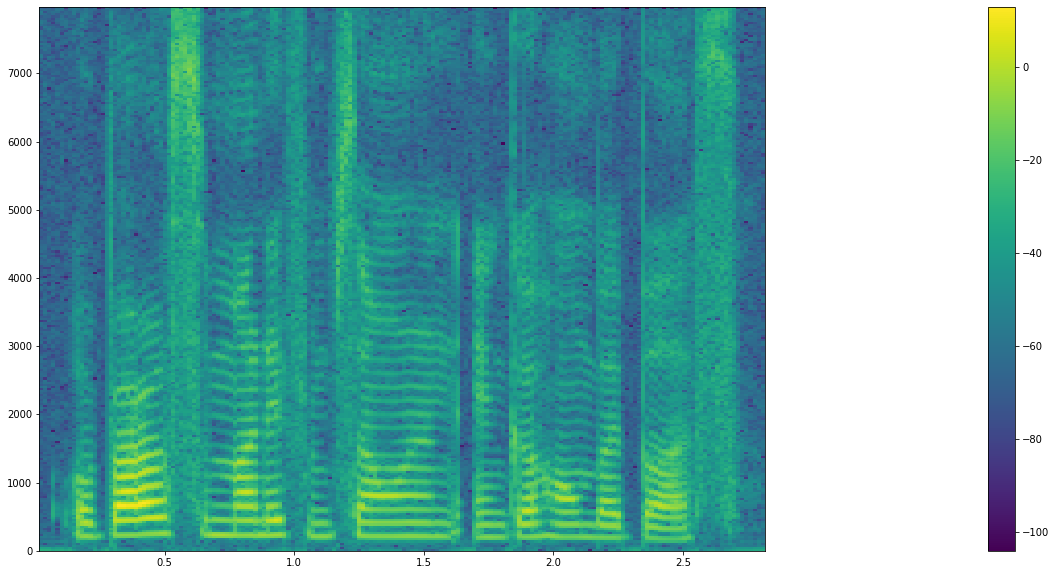

In [6]:
m_stft, v_freq, v_time = compute_stft(y1, sr1, frame_length, frame_shift, hann_win)
plot_spectrum(m_stft, v_freq, v_time)

### Speech 2

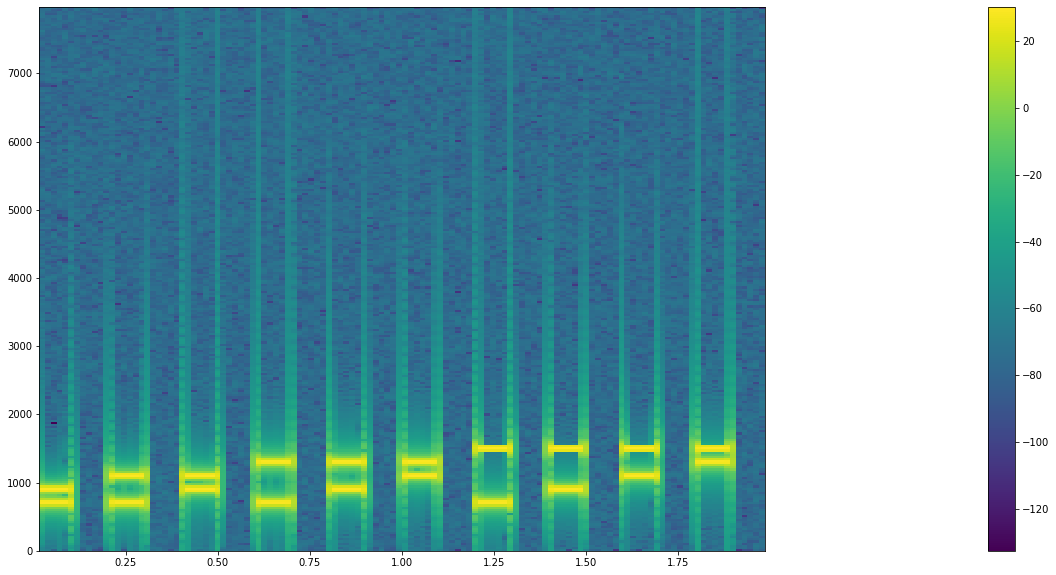

In [7]:
m_stft, v_freq, v_time = compute_stft(y2, sr2, frame_length, frame_shift, hann_win)
plot_spectrum(m_stft, v_freq, v_time)

## Part 3

In [8]:
v_test_signal = np.ones(2048)

In [9]:
sqrt_hann = np.sqrt(hann_win)

In [10]:
m_stft, _, _ = compute_stft(v_test_signal, 16000, 32, 16, sqrt_hann)

In [11]:
r_signal = compute_istft(m_stft, 16000, 16, sqrt_hann)

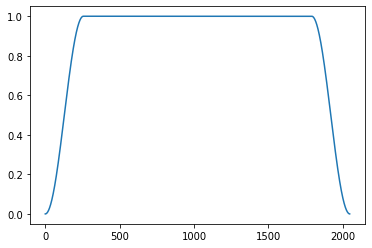

In [12]:
plt.plot(np.arange(2048), r_signal)